In [1]:
# Source https://www.kaggle.com/bbusath5/sf-bike-share-exploration-with-sql

Today I will be performing an exploratory analysis on the SF Bay Area Bike Share database using SQLite supplemented by the pandas library.  The goal of this project is to demonstrate proficiency in extracting data from database files using SQL and the ability to analyze these values in context. This database contains four data tables: station, status, trip, and weather.

Here are some questions I will try to answer over the course of this exploration:
* What was the trip with the longest duration?
* Do unregistered users take longer or shorter trips?
*  Which stations are the most popular?
* Which routes are the most popular?




**Importing Packages**

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

First, the data must be imported into python. I will set up a function that takes an sql query as a parameter and returns a dataframe visualization of that query. This will save coding time in the long run.

In [6]:
%load_ext sql

### Defining Color Palette 

In [33]:
colors = ["#FF9AA2", "#FFB7B2","#FFDAC1",'#E2F0CB','#B5EAD7','#C7CEEA']

keys = ["red", "salmon","tan",'light_green','aqua_green','purple']
values = ["#FF9AA2", "#FFB7B2","#FFDAC1",'#E2F0CB','#B5EAD7','#C7CEEA']
color_dct = dict(zip(keys, values))

'#FF9AA2'

### Columns in tables

In [14]:
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
%sql SELECT * FROM trip LIMIT 1;

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
4069,174,8/29/2013 9:08,2nd at South Park,64,8/29/2013 9:11,2nd at South Park,64,288,Subscriber,94114


In [13]:
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike.db
%sql SELECT * FROM yr_2019 LIMIT 1;

 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,counter,year,age
20,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160,Central Park West & W 76 St,40.77896784,-73.97374737,3283,W 89 St & Columbus Ave,40.7882213,-73.97041561,15839,Subscriber,1971,1,1,2019,48


### Number of Rides By Subscription Type

In [15]:
%%time
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
result_SF = %sql SELECT subscription_type, count(*) AS count FROM trip GROUP BY subscription_type;
df_user_type_SF = result_SF.DataFrame()

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.
CPU times: user 280 ms, sys: 134 ms, total: 413 ms
Wall time: 420 ms


In [17]:
%%time
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike.db
result_NYC = %sql SELECT usertype, count(*) AS count FROM cb GROUP BY usertype;
df_user_type_NYC = result_NYC.DataFrame()

 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.
CPU times: user 44.9 s, sys: 19.4 s, total: 1min 4s
Wall time: 1min 50s


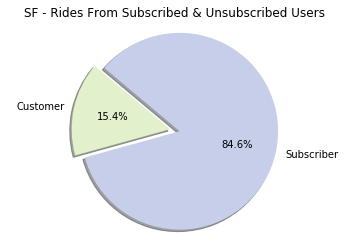

In [44]:
# SF
labels = ['Customer', 'Subscriber']
sizes = df_user_type_SF['count']
colors = [color_dct['light_green'], color_dct['purple']]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, )
plt.title('SF - Rides From Subscribed & Unsubscribed Users')
plt.axis('equal')
plt.show()

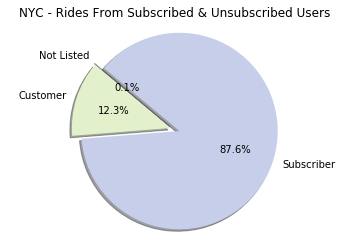

In [43]:
# NYC
labels = ['Not Listed', 'Customer', 'Subscriber']
sizes = df_user_type_NYC['count']
colors = ['lightyellow', color_dct['light_green'], color_dct['purple']]
explode = (0.1, 0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, )
plt.title('NYC - Rides From Subscribed & Unsubscribed Users')
plt.axis('equal')
plt.show()

### Rides From Particular Stations

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


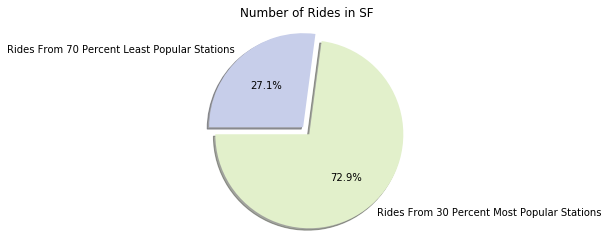

In [103]:
# SF
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
result_SF = %sql SELECT start_station_name AS Station, count(*) AS Count FROM trip GROUP BY start_station_name;
df_station_rides_SF = result_SF.DataFrame()

num_observations = df_station_rides_SF['Count'].sum()
df_station_rides_SF['Percent of Total Rides'] = round(100 * (df_station_rides_SF['Count'] / num_observations), 2)
df_station_rides_SF.rename(columns={'Count':'Number of Rides'}, inplace=True)
df_station_rides_SF.sort_values(by=['Number of Rides'], ascending=False, inplace=True)

percent=30
n_obs_top_percent = round(df_station_rides_SF.shape[0] * (percent/100))
rides_from_top_percent = df_station_rides_SF[0:n_obs_top_percent+1]['Number of Rides'].sum()
rides_from_bottom_percent = df_station_rides_SF[n_obs_top_percent+1:]['Number of Rides'].sum()
df_station_rides_SF

d = {'Percent of Stations': [str(percent), str(100-percent)], 'Number of Rides': [rides_from_top_percent, rides_from_bottom_percent]}
df = pd.DataFrame(data=d)

labels = [f'Rides From {percent} Percent Most Popular Stations', f'Rides From {100-percent} Percent Least Popular Stations']
sizes = df['Number of Rides']
colors = [color_dct['light_green'], color_dct['purple']]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180, )
plt.title('Number of Rides in SF')
plt.axis('equal')
plt.show()

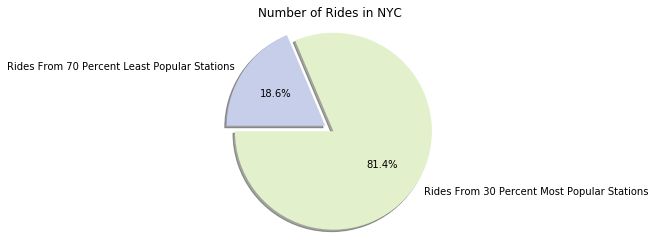

In [104]:
# NYC
df_station_rides = pd.read_csv('Number_of_Rides_Starting_From_Each_Station.csv')
df_station_rides.sort_values(by=['Number of Rides'], ascending=False, inplace=True)

percent=30
n_obs_top_percent = round(df_station_rides.shape[0] * (percent/100))
rides_from_top_percent = df_station_rides[0:n_obs_top_percent+1]['Number of Rides'].sum()
rides_from_bottom_percent = df_station_rides[n_obs_top_percent+1:]['Number of Rides'].sum()
rides_from_bottom_percent

d = {'Percent of Stations': [str(percent), str(100-percent)], 'Number of Rides': [rides_from_top_percent, rides_from_bottom_percent]}
df = pd.DataFrame(data=d)

labels = [f'Rides From {percent} Percent Most Popular Stations', f'Rides From {100-percent} Percent Least Popular Stations']
sizes = df['Number of Rides']
colors = [color_dct['light_green'], color_dct['purple']]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180, )
plt.title('Number of Rides in NYC')
plt.axis('equal')
plt.show()

**Q1: What was the trip with the longest duration? **

In [ ]:
query = '''
SELECT *
FROM trip
ORDER BY duration DESC
LIMIT 1
'''

run_query(query)

So it appears that the longest ride recorded is over six months long! It is very likely that this could have been a glitch. Pulling up the top 10 longest rides will hopefully provide some context as to whether this datapoint is a fluke.

In [ ]:
query = '''
SELECT *
FROM trip
ORDER BY duration DESC
LIMIT 10
'''

run_query(query)

Lets see if how common it is for a ride to go over 24 hours

In [ ]:
query = '''
SELECT count(*)
AS \'Long Trips\'
FROM trip 
WHERE 
duration >= 60*60*24;
'''
#60 seconds in a minute, 60 minutes in an hour, 24 hours in a day

run_query(query)

It appears that all but two of the 10 longest trips were made by unsubscribed customers. Let's see if unregistered customers are the main culprits.



**Q2: Do unregistered users take longer or shorter trips?**

First let's plot a pie chart to determine the proportion of unregistered users.

In [ ]:
query = '''
SELECT subscription_type, count(*) AS count
FROM trip
GROUP BY subscription_type
'''

df = pd.read_sql_query(query, db)

labels = ['Casual', 'Subscriber']
sizes = df['count']
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, )
plt.title('Subscribed vs Unsubscribed Riders')
plt.axis('equal')
plt.show()


In [ ]:
query = '''
SELECT subscription_type, AVG(duration)/60 AS 'Average Duration'
FROM trip
GROUP BY subscription_type
''' 
#since duration is in seconds, we will convert to minutes
run_query(query)

So unsubscribed customers take much longer rides on average. This would make sense as unsubscribed customers are more unaware of the charges that are incurred if you go over your 30 minute time limit. Other potential influential factors include the fact that unsubscribed customers come from certain demographics, such as tourists who would be doing more sight-seeing.



**Q3: Which stations are the most popular?**

In order to extract the data needed, the "trip" and "station" tables will need to be inner-joined:



In [ ]:
query = '''
SELECT station.name AS Station, count(*) AS Count
FROM station
INNER JOIN trip
ON station.id = trip.start_station_id
GROUP BY station.name
ORDER BY count DESC
LIMIT 5
''' 

run_query(query)

For anyone who is familiar with San Fransisco, it would make sense why these are the most popular stations. Townsend at 4th is blocks away from AT&T park, the financial district, and is the location of both a Caltrain and BART station. Both the Caltrain and BART serve hundreds of thousands of commuters every day. The Ferry Building is also one of the iconic landmarks of San Fransisco and is right along the Embarcadero, a very popular area among tourists.


Lets take this a step further. We can utilize the "status" table in the database and determine which stations are empty the most. It appears that the status table consists of status updates pulled from each station every two minutes. Each station contains 1,047,142 unique status readings.

In [ ]:

#there are 1047142 total status readings for each station

query = '''
SELECT station.name AS Station, count(*) AS 'Total Empty Readings'
FROM station

INNER JOIN status
ON status.station_id=station.id
WHERE status.bikes_available=0
GROUP BY station.name

ORDER BY count(*) DESC
LIMIT 10

''' 

run_query(query)

It turns out only two out of 5 of our most popular stations are in the top 10 most empty stations. The other three must be very popular drop-off stations as well, which allows the kiosks to maintain a steady number of bikes.

Lets create a quick plot to show the distribution of available bike readings for all stations.

In [ ]:
query = '''
SELECT bikes_available AS 'Bikes Available'
FROM status

''' 

df = pd.read_sql_query(query, db)
df['Bikes Available'].plot.hist(bins=27, title='Bikes Available (All Stations)', 
                                ec='black', alpha=0.5)

**Q4: Which routes are the most popular?**


This can be done using a simple "group by" statement.

In [ ]:
query='''
SELECT start_station_name, end_station_name, COUNT(*) AS Count
FROM trip
GROUP BY start_station_name, end_station_name
ORDER BY Count DESC
LIMIT 10;
  '''
run_query(query)